# Loading the data

The data here i am loading is the MIT arrythmia datset in csv format preprocessed by an organnisation called 
physionet.org

In [1]:
import pandas as pd

X_train = pd.read_csv("mitbih_train.csv",header = None)
X_test = pd.read_csv("mitbih_test.csv",header = None)

# scanning the dataset

In [2]:
type(X_train)

pandas.core.frame.DataFrame

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


From above we can see the dataset is in float so we will convert it in int and also the last column is the taregt column
and the data documentation is given below:

Number of Samples: 109446                                                                                                   
Number of Categories: 5                                                                                                     
Sampling Frequency: 125Hz                                                                                                   
Data Source: Physionet's MIT-BIH Arrhythmia Dataset                                                                         
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]



-N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

S,V,F  will be considered as some kind of arrhythmia

In [5]:
X_train[187] = X_train[187].astype(int)
X_train[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

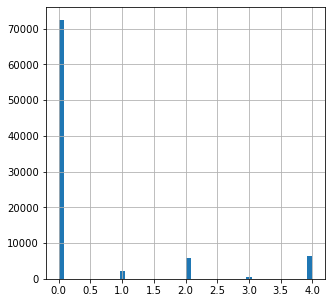

In [6]:
import matplotlib.pyplot as plt

X_train[187].hist(bins=50,figsize=(5,5))
plt.show

 NOTE- Here we can see there is a lot of imbalance or we can say a bias in the data towards the normal beat.
we have to fix this imabalance so our model can truly learn some insights from the data  otherwise
our model will be biased towards the normal beat.

There are many methods of fixing the imbalance of the dataset like resampling methods.
Also we should use right metrics for the evaluation in classification because normal accuracy can be misleading,so
we can use metrics like f1_score, confusion matrix, recall score ,auc.

In [7]:
from sklearn.utils import resample

row1=X_train[X_train[187]==1]
row2=X_train[X_train[187]==2]
row3=X_train[X_train[187]==3]
row4=X_train[X_train[187]==4]
row0=(X_train[X_train[187]==0]).sample(n=20000,random_state=42)

row1_upsample=resample(row1,replace=True,n_samples=20000,random_state=123)
row2_upsample=resample(row2,replace=True,n_samples=20000,random_state=124)
row3_upsample=resample(row3,replace=True,n_samples=20000,random_state=125)
row4_upsample=resample(row4,replace=True,n_samples=20000,random_state=126)

X_train_resampled=pd.concat([row0,row1_upsample,row2_upsample,row3_upsample,row4_upsample])

Now checking the balanced dataset

In [8]:
print(X_train_resampled[187].value_counts())

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

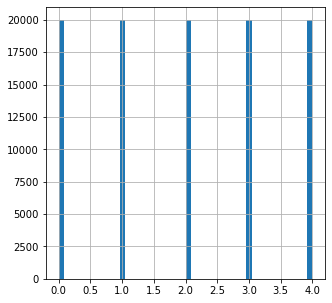

In [9]:
X_train_resampled[187].hist(bins=50,figsize=(5,5))
plt.show

In [10]:
X_train_resampled.shape

(100000, 188)

In [11]:
type(X_train_resampled)

pandas.core.frame.DataFrame

Now i will be adding noise to generalize my train data and to avoid overfitting

In [12]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

# seperating labels from data and adding noise

In [13]:
from keras.utils.np_utils import to_categorical

y_train=X_train_resampled[187]
y_test=X_test[187]
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [14]:
import numpy as np

X_train_mod=X_train_resampled.iloc[:,:186].values
X_test_mod=X_test.iloc[:,:186].values

for i in range(len(X_train_resampled)):
    X_train_mod[i,:186]= add_gaussian_noise(X_train_mod[i,:186])
    
X_train_mod = X_train_mod.reshape(len(X_train_mod), X_train_mod.shape[1],1)
X_test_mod = X_test_mod.reshape(len(X_test_mod), X_test_mod.shape[1],1)

In [15]:
X_train_mod.shape

(100000, 186, 1)

In [16]:
type(X_train_mod)

numpy.ndarray

# making the model

In [17]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras

In [18]:
model = models.Sequential([
    keras.layers.Conv1D(64, (6), activation='relu', input_shape=(186,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=(3), strides=(2), padding="same"),
    keras.layers.Conv1D(64, (3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=(2), strides=(2), padding="same"),
    keras.layers.Conv1D(64, (3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool1D(pool_size=(2), strides=(2), padding="same"),
    layers.Flatten(),
    keras.layers.Dense(64,activation = "relu"),
    keras.layers.Dense(32,activation = "relu"),
    keras.layers.Dense(5,activation = "softmax")
])

In [19]:
 model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])

In [20]:
 history=model.fit(X_train_mod, y_train,epochs=5,batch_size=32,validation_data=(X_test_mod,y_test))

Epoch 1/5
3125/3125 [==============================] - 151s 46ms/step - loss: 0.8951 - accuracy: 0.6560 - val_loss: 1.0534 - val_accuracy: 0.5658
Epoch 2/5
3125/3125 [==============================] - 152s 49ms/step - loss: 0.7927 - accuracy: 0.6993 - val_loss: 0.5653 - val_accuracy: 0.8605
Epoch 3/5
3125/3125 [==============================] - 154s 49ms/step - loss: 0.7583 - accuracy: 0.7131 - val_loss: 0.8208 - val_accuracy: 0.7370
Epoch 4/5
3125/3125 [==============================] - 154s 49ms/step - loss: 0.7327 - accuracy: 0.7215 - val_loss: 0.7606 - val_accuracy: 0.8179
Epoch 5/5
3125/3125 [==============================] - 145s 46ms/step - loss: 0.7074 - accuracy: 0.7320 - val_loss: 0.8607 - val_accuracy: 0.6556


In [23]:
scores = model.evaluate((X_test_mod),y_test)
print(f"accuracy is equal to {scores[1]*100}")

685/685 [==============================] - 8s 12ms/step - loss: 0.8607 - accuracy: 0.6556
accuracy is equal to 65.55819511413574


# Note-
The accuracy here is not so much impressive due to the following reasons:
1. We have used only 5 epcohs because it will take very long time to train it.
2. We can see that the accuracy of validation and traininig set is gradually increasing as the number of epochs
    is increasing so increasing the epochs might increase the accuracy.
3. We can also see that the model is overfitting the data so we can tweak its hyperparameters and fix this

I have made this model very simple just to give a brief overview of the system.

Thankyou